In [1]:
import os
import time

# Self-code imports
import polytopes.baselines as baselines
from polytopes.model.note import Note
from polytopes.model.chord import Chord
import polytopes.polytopical_costs as pc
import polytopes.data_manipulation as dm
import polytopes.chord_movement as mvt
import polytopes.pattern_manipulation as pm
import polytopes.sequence_segmentation as seq_seg


#Generic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

In [2]:
pattern_persist_path = "C:\\Users\\amarmore\\Desktop\\Projects\\PhD main projects\\On Git\\Code\\Polytopes and relation\\polytopes"
flow_file_path = "C:\\Users\\amarmore\\Desktop\\Annotations MIREX Quaero\\annotations_as_flow\\"
song = "002"
bag_of_chords = []
max_size = 48
file = open(flow_file_path + song + ".flow", "r") 
for chord in file.readlines():
    bag_of_chords.append(chord.split("\n")[0])

C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\s_and_c\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\s_and_c\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


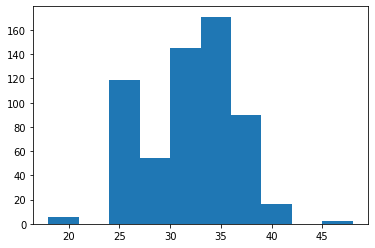

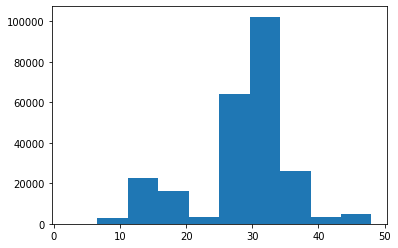

In [3]:
cnt_equal = []
cnt_diff = []
for current_idx in range(2, len(bag_of_chords)):
    if current_idx < 8:
        possible_starts = [0]
    elif current_idx == len(bag_of_chords) - 1:
        possible_starts = sh.possible_segment_start(current_idx, min_size = 2, max_size = max_size)
    else:
        possible_starts = sh.possible_segment_start(current_idx, min_size = 8, max_size = max_size)
    for possible_start_idx in possible_starts:
        if possible_start_idx < 0:
            raise err.ToDebugException("Invalid value of start index.")
        segment = [bag_of_chords[k] for k in range(possible_start_idx, current_idx + 1)]
        segment_size = len(segment)
        
        try:
            this_bag_direct = np.load("{}\\persisted_content\\compute_patterns_with_antecedents_for_size_{}.npy".format(pattern_persist_path, segment_size), allow_pickle = True)
            this_bag_global = np.load("{}\\persisted_content\\compute_patterns_with_global_antecedents_for_size_{}.npy".format(pattern_persist_path, segment_size), allow_pickle = True)
        except FileNotFoundError:
            this_bag_direct = sh.compute_patterns_with_antecedents_for_size(segment_size)
            arr = np.array(this_bag_direct, dtype=object)
            np.save("{}\\persisted_content\\compute_patterns_with_antecedents_for_size_{}".format(pattern_persist_path, segment_size), arr)
            this_bag_global = sh.compute_patterns_with_global_antecedents_for_size(segment_size)
            arr_glob = np.array(this_bag_global, dtype=object)
            np.save("{}\\persisted_content\\compute_patterns_with_global_antecedents_for_size_{}".format(pattern_persist_path, segment_size), arr_glob)

        if this_bag_direct != []:
            this_segment_cost = math.inf
            
            if len(this_bag_direct) != len(this_bag_global):
                raise NotImplementedError("Chelou")

            for i in range(len(this_bag_direct)):
                a_pattern_direct = this_bag_direct[i]
                a_pattern_global = this_bag_global[i]
                if not np.array(a_pattern_direct[0] == a_pattern_global[0]):               
                    raise NotImplementedError("Aussi chelou")

                this_polytope_cost_direct = pc.guichaoua_cost(segment, a_pattern_direct[0], a_pattern_direct[3], a_pattern_direct[4], a_pattern_direct[5])
                this_polytope_cost_global = pc.guichaoua_cost_global_antecedents_successors(segment, a_pattern_global[0], a_pattern_global[3], a_pattern_global[4], a_pattern_global[5])
                if this_polytope_cost_direct != this_polytope_cost_global:
                    cnt_diff.append(segment_size)
                    #print("la")
                else:
                    cnt_equal.append(segment_size)
                    
plt.hist(cnt_diff)
plt.show()
plt.hist(cnt_equal)
plt.show()